# Diabetes (clustering)¶
다음의 당뇨 데이터의 혈압, 당뇨진행 정도 데이터를 이용하여 군집화(clustering)하여라.

1. sklearn을 이용하지 않고 (자신의 코드로)
2. sklearn을 이용해서
3. cluster 수를 결정하는 좋은 방법을 고안하여 적용해보아라.

In [1]:
from sklearn import datasets

In [2]:
diabetes=datasets.load_diabetes()

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [4]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

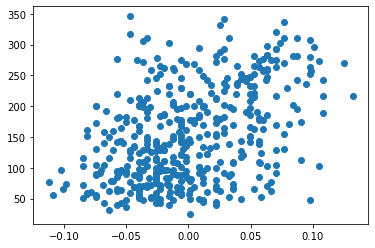

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X_p=diabetes.data[:,3] # 혈압
X_d = diabetes.target # 당뇨 진행 정도
X=[X_p,X_d]
plt.scatter(X[0],X[1])

## 1. sklearn을 이용하지 않고 (자신의 코드로)

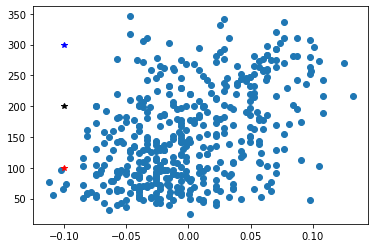

In [6]:
plt.scatter(X[0],X[1])
plt.plot([-0.10],[100],'r*')
plt.plot([-0.10],[200],'k*')
plt.plot([-0.10],[300],'b*')

집단이 확실하지 않으나 당뇨 진행정도가 적음, 보통, 많음으로 3개의 집단으로 나누고 3개의 중심점을 임의로 선택했다.

((-0.01663942586403261, 92.0909090909091),
 (0.011475735593611872, 197.48888888888888),
 (0.03811564236858993, 281.4769230769231))

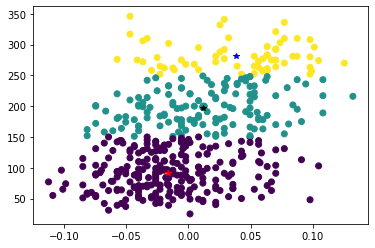

In [7]:
temp=[]
for (i,j) in zip(X[0],X[1]):
    ri1=(i-(-0.10))**2 + (j-100)**2
    ri2=(i-(-0.10))**2 + (j-200)**2
    ri3=(i-(-0.10))**2 + (j-300)**2
    m=min(ri1,ri2,ri3)
    temp.append([ri1,ri2,ri3].index(m))
x1=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==0)])
x2=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==1)])
x3=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==2)])
rf1=np.mean(x1[0]),np.mean(x1[1])
rf2=np.mean(x2[0]),np.mean(x2[1])
rf3=np.mean(x3[0]),np.mean(x3[1])
plt.scatter(X[0],X[1],c=temp)
plt.plot(rf1[0],rf1[1],'r*')
plt.plot(rf2[0],rf2[1],'k*')
plt.plot(rf3[0],rf3[1],'b*')
rf1,rf2,rf3

In [8]:
ri1_0,ri1_1=0,0
ri2_0,ri2_1=0,0
ri3_0,ri3_1=0,0

while abs(ri1_0 - rf1[0])+abs(ri1_1 - rf1[1])+abs(ri2_0 - rf2[0])+abs(ri2_1 - rf2[1])+abs(ri3_0 - rf3[0])+abs(ri3_1 - rf3[1])>0:
    ri1_0,ri1_1=rf1[0],rf1[1]
    ri2_0,ri2_1=rf2[0],rf2[1]
    ri3_0,ri3_1=rf3[0],rf3[1]
    temp=[]
    for (i,j) in zip(X[0],X[1]):
        r1=(i-(rf1[0]))**2 + (j-(rf1[1]))**2
        r2=(i-(rf2[0]))**2 + (j-(rf2[1]))**2
        r3=(i-(rf3[0]))**2 + (j-(rf3[1]))**2
        m=min(r1,r2,r3)
        temp.append([r1,r2,r3].index(m))
    x1=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==0)])
    x2=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==1)])
    x3=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==2)])
    rf1=np.mean(x1[0]),np.mean(x1[1])
    rf2=np.mean(x2[0]),np.mean(x2[1])
    rf3=np.mean(x3[0]),np.mean(x3[1])
    print(rf1,rf2,rf3)

(-0.01681825312856728, 90.17094017094017) (0.007123599028926794, 188.8671875) (0.03779563195477713, 274.6)
(-0.017015838944229332, 86.60730593607306) (0.0028804793149352155, 180.18796992481202) (0.037148499776665525, 270.1222222222222)
(-0.01761582698404782, 83.96634615384616) (0.0017930122025058132, 175.7304964539007) (0.03668040099063102, 268.81720430107526)
(-0.017936547564182517, 82.55940594059406) (0.0014367409008142233, 173.21379310344827) (0.03594584397207225, 267.89473684210526)
(-0.01788250233156776, 80.91282051282052) (6.300678460703646e-06, 170.48) (0.03593961704006871, 266.9381443298969)
(-0.01800158666779149, 80.19791666666667) (-0.0003150339203895519, 167.57823129251702) (0.03400596724770182, 264.18446601941747)
(-0.018227676859729203, 79.4973544973545) (-0.0025009835664255267, 165.69387755102042) (0.03596863689390027, 262.83962264150944)
(-0.018404348617533525, 79.26595744680851) (-0.0027586133462289206, 165.06802721088437) (0.03612648319618702, 262.39252336448595)
(-0.0

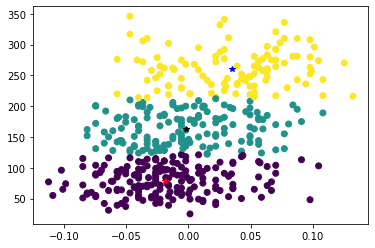

In [9]:
plt.scatter(X[0],X[1],c=temp)
plt.plot(rf1[0],rf1[1],'r*')
plt.plot(rf2[0],rf2[1],'k*')
plt.plot(rf3[0],rf3[1],'b*')

11번 반복하면 더이상의 중심점 변화가 없다.

## 2. sklearn을 이용해서

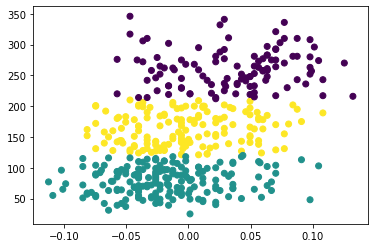

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =3)
data = np.transpose(X)
kmeans.fit(data)
plt.scatter(X[0],X[1],c=kmeans.labels_)

In [11]:
kmeans.labels_

array([2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 2,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 1,
       2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2,
       0, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2,
       1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2,
       1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 0,
       1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 0,

In [12]:
temp_array=np.array(temp)
temp_array

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 2, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 1,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 1, 2, 0, 2, 0,
       1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1,
       2, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1,
       0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1,
       0, 0, 1, 1, 0, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0,
       1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 1, 2,
       0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2,

In [13]:
label_=np.where(temp_array == 0, 3, temp_array)
label_=np.where(label_ == 1, 4, label_)
label_=np.where(label_ == 2, 5, label_)
label_=np.where(label_ == 3, kmeans.labels_[1], label_)
label_=np.where(label_ == 4, kmeans.labels_[0], label_)
label_=np.where(label_ == 5, kmeans.labels_[9], label_)

In [14]:
label_-kmeans.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [15]:
np.count_nonzero(label_-kmeans.labels_)

3

n_clusters = 3으로 했을 때 sklearn을 이용하지 않고 clustering한 것과 비교해서 3개의 차이만 있다.

## 3. cluster 수를 결정하는 좋은 방법을 고안하여 적용해보아라.

In [16]:
kmeans.inertia_

296608.53206791554

In [17]:
kiner = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    kiner[k] = kmeans.inertia_

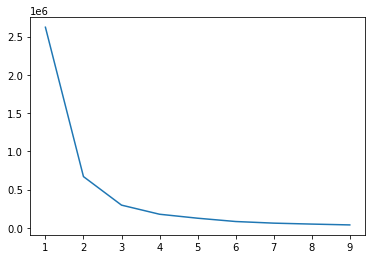

In [18]:
plt.plot(list(kiner.keys()), list(kiner.values()))

In [19]:
list(kiner.values())

[2621010.1244343915,
 669460.781460548,
 296608.53206791554,
 177496.99187585307,
 125618.18375360515,
 82481.50740492895,
 61189.508369219824,
 48886.95074391348,
 38010.80845030532]

Inertia value를 보면 적정 클러스터 수를 선택할 수 있다. 

Inertia value는 군집화가 된 후에, 각 중심점에서 군집의 데이터간의 거리를 합산한 것이므로 군집의 응집도를 나타내는 값이다. 

이 값이 작을수록 응집도가 높아 군집화가 잘 되었다고 평가할 수 있다.

Inertia 값이 급격하게 하강해서 3-4사이에서는 변화의 폭이 크지 않은 것을 볼 수 있다.

이 값을 보면, 당뇨 데이터의 혈압, 당뇨진행 정도 데이터는 3-4개의 클러스터로 분류하는 것이 적절하다고 판단할 수 있다. 

(-0.012515097500055288, 108.79411764705883) (0.028158969375124823, 249.64705882352942)
(-0.013744102204847097, 103.44405594405595) (0.025197520708886707, 241.39743589743588)
(-0.014872617817958109, 99.96703296703296) (0.024024998013624968, 236.4023668639053)
(-0.015685452897297985, 98.37453183520599) (0.0239315195633064, 234.15428571428572)
(-0.015510500813746837, 97.31939163498099) (0.022789171586678637, 232.6703910614525)
(-0.01575830929221475, 97.05725190839695) (0.02293709463644623, 232.3)
(-0.01575830929221475, 97.05725190839695) (0.02293709463644623, 232.3)


0

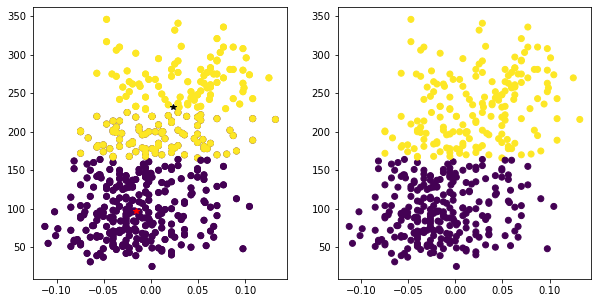

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
temp=[]
for (i,j) in zip(X[0],X[1]):
    ri1=(i-(-0.10))**2 + (j-150)**2
    ri2=(i-(-0.10))**2 + (j-300)**2
    m=min(ri1,ri2)
    temp.append([ri1,ri2].index(m))
x1=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==0)])
x2=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==1)])

rf1=np.mean(x1[0]),np.mean(x1[1])
rf2=np.mean(x2[0]),np.mean(x2[1])

plt.scatter(X[0],X[1],c=temp)

ri1_0,ri1_1=0,0
ri2_0,ri2_1=0,0

while abs(ri1_0 - rf1[0])+abs(ri1_1 - rf1[1])+abs(ri2_0 - rf2[0])+abs(ri2_1 - rf2[1])>0:
    ri1_0,ri1_1=rf1[0],rf1[1]
    ri2_0,ri2_1=rf2[0],rf2[1]

    temp=[]
    for (i,j) in zip(X[0],X[1]):
        r1=(i-(rf1[0]))**2 + (j-(rf1[1]))**2
        r2=(i-(rf2[0]))**2 + (j-(rf2[1]))**2

        m=min(r1,r2)
        temp.append([r1,r2].index(m))
    x1=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==0)])
    x2=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==1)])

    rf1=np.mean(x1[0]),np.mean(x1[1])
    rf2=np.mean(x2[0]),np.mean(x2[1])

    print(rf1,rf2)
    
plt.scatter(X[0],X[1],c=temp)
plt.plot(rf1[0],rf1[1],'r*')
plt.plot(rf2[0],rf2[1],'k*')

plt.subplot(1,2,2)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =2)
data = np.transpose(X)
kmeans.fit(data)
plt.scatter(X[0],X[1],c=kmeans.labels_)

temp_array=np.array(temp)

label_=np.where(temp_array == 0, 2, temp_array)
label_=np.where(label_ == 1, 3, label_)
label_=np.where(label_ == 2, kmeans.labels_[0], label_)
label_=np.where(label_ == 3, kmeans.labels_[3], label_)

np.count_nonzero(label_-kmeans.labels_)

번외로 n_clusters = 2로 했을 때 sklearn을 이용하지 않고 clustering한 것과 똑같이 군집화되었다.

(-0.018225266333982332, 81.85929648241206) (-0.0015843751357747001, 166.8409090909091) (0.03145432042218052, 246.43373493975903) (0.043759175833707795, 302.7142857142857)
(-0.017939968245051716, 79.96335078534031) (-0.0030654212953646243, 163.5985401459854) (0.03237752455028663, 241.94871794871796) (0.036695826037431406, 296.80555555555554)
(-0.018652330877144362, 78.80645161290323) (-0.002342502217000088, 161.54285714285714) (0.028758096385219874, 238.55405405405406) (0.03974249335768215, 293.23809523809524)
(-0.018868281547901784, 78.34782608695652) (-0.0022696239322278077, 159.4817518248175) (0.027416718192746332, 235.4025974025974) (0.03799124960653925, 292.09090909090907)
(-0.019210060149842174, 78.12021857923497) (-0.001223569241474325, 156.0625) (0.022425426593449326, 229.63855421686748) (0.03772390548069989, 289.8125)
(-0.01968436941541604, 77.45555555555555) (-0.0022732804781113647, 153.56349206349208) (0.02209358363501691, 225.66265060240963) (0.03765759232661455, 287.2075471

34

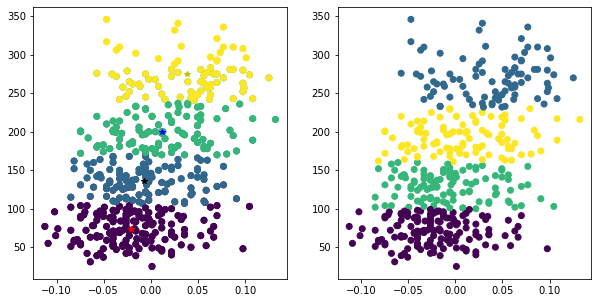

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
temp=[]
for (i,j) in zip(X[0],X[1]):
    ri1=(i-(-0.10))**2 + (j-100)**2
    ri2=(i-(-0.10))**2 + (j-175)**2
    ri3=(i-(-0.10))**2 + (j-250)**2
    ri4=(i-(-0.10))**2 + (j-325)**2
    m=min(ri1,ri2,ri3,ri4)
    temp.append([ri1,ri2,ri3,ri4].index(m))
x1=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==0)])
x2=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==1)])
x3=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==2)])
x4=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==3)])
rf1=np.mean(x1[0]),np.mean(x1[1])
rf2=np.mean(x2[0]),np.mean(x2[1])
rf3=np.mean(x3[0]),np.mean(x3[1])
rf4=np.mean(x4[0]),np.mean(x4[1])
plt.scatter(X[0],X[1],c=temp)

ri1_0,ri1_1=0,0
ri2_0,ri2_1=0,0
ri3_0,ri3_1=0,0
ri4_0,ri4_1=0,0

while abs(ri1_0 - rf1[0])+abs(ri1_1 - rf1[1])+abs(ri2_0 - rf2[0])+abs(ri2_1 - rf2[1])+abs(ri3_0 - rf3[0])+abs(ri3_1 - rf3[1])+abs(ri4_0 - rf4[0])+abs(ri4_1 - rf4[1])>0:
    ri1_0,ri1_1=rf1[0],rf1[1]
    ri2_0,ri2_1=rf2[0],rf2[1]
    ri3_0,ri3_1=rf3[0],rf3[1]
    ri4_0,ri4_1=rf4[0],rf4[1]
    temp=[]
    for (i,j) in zip(X[0],X[1]):
        r1=(i-(rf1[0]))**2 + (j-(rf1[1]))**2
        r2=(i-(rf2[0]))**2 + (j-(rf2[1]))**2
        r3=(i-(rf3[0]))**2 + (j-(rf3[1]))**2
        r4=(i-(rf4[0]))**2 + (j-(rf4[1]))**2
        m=min(r1,r2,r3,r4)
        temp.append([r1,r2,r3,r4].index(m))
    x1=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==0)])
    x2=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==1)])
    x3=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==2)])
    x4=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==3)])
    rf1=np.mean(x1[0]),np.mean(x1[1])
    rf2=np.mean(x2[0]),np.mean(x2[1])
    rf3=np.mean(x3[0]),np.mean(x3[1])
    rf4=np.mean(x4[0]),np.mean(x4[1])

    print(rf1,rf2,rf3,rf4)
    
plt.scatter(X[0],X[1],c=temp)
plt.plot(rf1[0],rf1[1],'r*')
plt.plot(rf2[0],rf2[1],'k*')
plt.plot(rf3[0],rf3[1],'b*')
plt.plot(rf4[0],rf4[1],'y*')

plt.subplot(1,2,2)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =4)
data = np.transpose(X)
kmeans.fit(data)
plt.scatter(X[0],X[1],c=kmeans.labels_)

temp_array=np.array(temp)

label_=np.where(temp_array == 0, 4, temp_array)
label_=np.where(label_ == 1, 5, label_)
label_=np.where(label_ == 2, 6, label_)
label_=np.where(label_ == 3, 7, label_)
label_=np.where(label_ == 4, kmeans.labels_[1], label_)
label_=np.where(label_ == 5, kmeans.labels_[0], label_)
label_=np.where(label_ == 6, kmeans.labels_[3], label_)
label_=np.where(label_ == 7, kmeans.labels_[9], label_)

np.count_nonzero(label_-kmeans.labels_)

n_clusters = 4로 했을 때 sklearn을 이용하지 않고 clustering한 것과 비교하면 약 7.5%의 차이가 있다. 

(-0.021292525122505356, 67.12403100775194) (-0.01137714240921359, 119.5137614678899) (0.004679452434774434, 183.77570093457945) (0.03593961704006871, 266.9381443298969)
(-0.021605933179248252, 67.51908396946565) (-0.010794649103051352, 121.87719298245614) (0.006247018770199498, 187.53846153846155) (0.03668040099063102, 268.81720430107526)
(-0.021634568198151995, 68.11194029850746) (-0.010241146143558885, 123.67826086956522) (0.006654866529330124, 188.93) (0.03668040099063102, 268.81720430107526)
(-0.02170358682343435, 68.50735294117646) (-0.008658389146464832, 124.99137931034483) (0.005616326359261493, 189.96907216494844) (0.03668040099063102, 268.81720430107526)
(-0.02254067695301234, 69.29285714285714) (-0.007146126567457713, 126.02678571428571) (0.005501153533606432, 190.3673469387755) (0.03714073807264803, 269.25)
(-0.022797298333379554, 70.0625) (-0.006807801179164468, 127.66363636363636) (0.006403345698241515, 191.04166666666666) (0.03714073807264803, 269.25)
(-0.0229166226034410

0

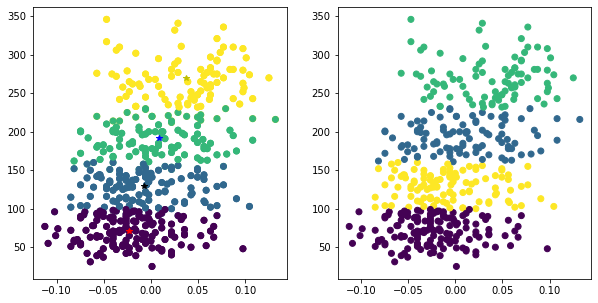

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
temp=[]
for (i,j) in zip(X[0],X[1]):
    ri1=(i-(-0.10))**2 + (j-60)**2
    ri2=(i-(-0.10))**2 + (j-120)**2
    ri3=(i-(-0.10))**2 + (j-180)**2
    ri4=(i-(-0.10))**2 + (j-240)**2
    m=min(ri1,ri2,ri3,ri4)
    temp.append([ri1,ri2,ri3,ri4].index(m))
x1=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==0)])
x2=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==1)])
x3=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==2)])
x4=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==3)])
rf1=np.mean(x1[0]),np.mean(x1[1])
rf2=np.mean(x2[0]),np.mean(x2[1])
rf3=np.mean(x3[0]),np.mean(x3[1])
rf4=np.mean(x4[0]),np.mean(x4[1])
plt.scatter(X[0],X[1],c=temp)

ri1_0,ri1_1=0,0
ri2_0,ri2_1=0,0
ri3_0,ri3_1=0,0
ri4_0,ri4_1=0,0

while abs(ri1_0 - rf1[0])+abs(ri1_1 - rf1[1])+abs(ri2_0 - rf2[0])+abs(ri2_1 - rf2[1])+abs(ri3_0 - rf3[0])+abs(ri3_1 - rf3[1])+abs(ri4_0 - rf4[0])+abs(ri4_1 - rf4[1])>0:
    ri1_0,ri1_1=rf1[0],rf1[1]
    ri2_0,ri2_1=rf2[0],rf2[1]
    ri3_0,ri3_1=rf3[0],rf3[1]
    ri4_0,ri4_1=rf4[0],rf4[1]
    temp=[]
    for (i,j) in zip(X[0],X[1]):
        r1=(i-(rf1[0]))**2 + (j-(rf1[1]))**2
        r2=(i-(rf2[0]))**2 + (j-(rf2[1]))**2
        r3=(i-(rf3[0]))**2 + (j-(rf3[1]))**2
        r4=(i-(rf4[0]))**2 + (j-(rf4[1]))**2
        m=min(r1,r2,r3,r4)
        temp.append([r1,r2,r3,r4].index(m))
    x1=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==0)])
    x2=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==1)])
    x3=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==2)])
    x4=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==3)])
    rf1=np.mean(x1[0]),np.mean(x1[1])
    rf2=np.mean(x2[0]),np.mean(x2[1])
    rf3=np.mean(x3[0]),np.mean(x3[1])
    rf4=np.mean(x4[0]),np.mean(x4[1])

    print(rf1,rf2,rf3,rf4)
    
plt.scatter(X[0],X[1],c=temp)
plt.plot(rf1[0],rf1[1],'r*')
plt.plot(rf2[0],rf2[1],'k*')
plt.plot(rf3[0],rf3[1],'b*')
plt.plot(rf4[0],rf4[1],'y*')

plt.subplot(1,2,2)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =4)
data = np.transpose(X)
kmeans.fit(data)
plt.scatter(X[0],X[1],c=kmeans.labels_)

temp_array=np.array(temp)

label_=np.where(temp_array == 0, 4, temp_array)
label_=np.where(label_ == 1, 5, label_)
label_=np.where(label_ == 2, 6, label_)
label_=np.where(label_ == 3, 7, label_)
label_=np.where(label_ == 4, kmeans.labels_[1], label_)
label_=np.where(label_ == 5, kmeans.labels_[0], label_)
label_=np.where(label_ == 6, kmeans.labels_[3], label_)
label_=np.where(label_ == 7, kmeans.labels_[9], label_)

np.count_nonzero(label_-kmeans.labels_)

n_clusters = 4로 했을 때 sklearn을 이용하지 않고 clustering할 때 초기 중심점을 다르게 잡으면, sklearn을 이용한것과 군집화의 차이가 없다.

이를 통해 자신만의 코드는 중심점을 초기에 어떻게 잡느냐에 영향을 받는다는 것을 알 수 있다.

(-0.021292525122505356, 67.12403100775194) (-0.008757879581661885, 128.7887323943662) (0.023335407259644652, 235.64912280701753)
(-0.022797298333379554, 70.0625) (-0.004561497849151537, 139.35570469798657) (0.02659378617134424, 244.2281879194631)
(-0.021228082501179097, 73.225) (-0.002528496381649509, 147.46896551724137) (0.027468066974656136, 249.22627737226279)
(-0.019435302657560015, 75.11242603550296) (-0.00257598425328725, 152.91034482758621) (0.02857878020198712, 252.9453125)
(-0.0188682815472639, 76.5909090909091) (-0.0031764420080694516, 158.62666666666667) (0.03273520563387001, 258.3534482758621)
(-0.01968436941541604, 77.45555555555555) (-0.0017039921942959661, 160.751677852349) (0.03360248966128356, 259.72566371681415)
(-0.019210060149842174, 78.12021857923497) (-0.002165706155159637, 162.27702702702703) (0.03455824791337658, 260.6306306306306)
(-0.018868281547901784, 78.34782608695652) (-0.0024775626773524905, 162.56462585034015) (0.03455824791337658, 260.6306306306306)
(-0

0

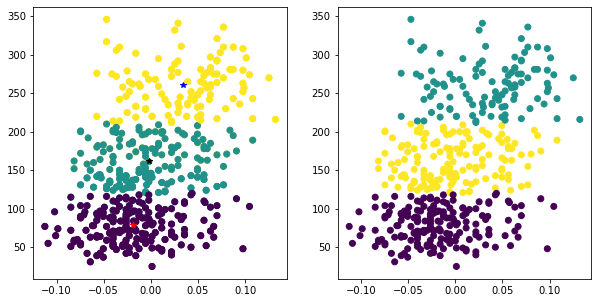

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
temp=[]
for (i,j) in zip(X[0],X[1]):
    ri1=(i-(-0.10))**2 + (j-60)**2
    ri2=(i-(-0.10))**2 + (j-120)**2
    ri3=(i-(-0.10))**2 + (j-180)**2
    m=min(ri1,ri2,ri3)
    temp.append([ri1,ri2,ri3].index(m))
x1=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==0)])
x2=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==1)])
x3=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==2)])
rf1=np.mean(x1[0]),np.mean(x1[1])
rf2=np.mean(x2[0]),np.mean(x2[1])
rf3=np.mean(x3[0]),np.mean(x3[1])
plt.scatter(X[0],X[1],c=temp)

ri1_0,ri1_1=0,0
ri2_0,ri2_1=0,0
ri3_0,ri3_1=0,0

while abs(ri1_0 - rf1[0])+abs(ri1_1 - rf1[1])+abs(ri2_0 - rf2[0])+abs(ri2_1 - rf2[1])+abs(ri3_0 - rf3[0])+abs(ri3_1 - rf3[1])>0:
    ri1_0,ri1_1=rf1[0],rf1[1]
    ri2_0,ri2_1=rf2[0],rf2[1]
    ri3_0,ri3_1=rf3[0],rf3[1]
    temp=[]
    for (i,j) in zip(X[0],X[1]):
        r1=(i-(rf1[0]))**2 + (j-(rf1[1]))**2
        r2=(i-(rf2[0]))**2 + (j-(rf2[1]))**2
        r3=(i-(rf3[0]))**2 + (j-(rf3[1]))**2
        m=min(r1,r2,r3)
        temp.append([r1,r2,r3].index(m))
    x1=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==0)])
    x2=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==1)])
    x3=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==2)])
    rf1=np.mean(x1[0]),np.mean(x1[1])
    rf2=np.mean(x2[0]),np.mean(x2[1])
    rf3=np.mean(x3[0]),np.mean(x3[1])

    print(rf1,rf2,rf3)
    
plt.scatter(X[0],X[1],c=temp)
plt.plot(rf1[0],rf1[1],'r*')
plt.plot(rf2[0],rf2[1],'k*')
plt.plot(rf3[0],rf3[1],'b*')

plt.subplot(1,2,2)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =3)
data = np.transpose(X)
kmeans.fit(data)
plt.scatter(X[0],X[1],c=kmeans.labels_)

temp_array=np.array(temp)

label_=np.where(temp_array == 0, 3, temp_array)
label_=np.where(label_ == 1, 4, label_)
label_=np.where(label_ == 2, 5, label_)
label_=np.where(label_ == 3, kmeans.labels_[1], label_)
label_=np.where(label_ == 4, kmeans.labels_[0], label_)
label_=np.where(label_ == 5, kmeans.labels_[9], label_)

np.count_nonzero(label_-kmeans.labels_)

위에서 n_clusters = 3으로 했을 때 나타난 3개의 차이도, 초기에 중심점을 어떻게 잡느냐에 따라 sklearn을 이용한것과 동일하게 군집화 시킬 수 있다.